### List of tables:


1. [Table 2: Regressing the probability of player X to choose the selfish option](#selfish_reg)


### List of figures:

2. [Figure 2: Proportion of players chosing the selfish option](#selfish_bar)

#### Imports libraries

In [1]:
import matplotlib.pyplot as plt #plotting
import os #file system handling
import pandas as pd #dataframe handling
import statsmodels.api as sm #regression analysis
import statsmodels.formula.api as smf # regressions analysis

from matplotlib.ticker import FuncFormatter #formating graphs 
from scipy import stats #statistics module
from statsmodels.iolib.summary2 import summary_col #regression output table
from statsmodels.stats.anova import anova_lm #regression anova table
from statsmodels.stats.multicomp import MultiComparison #multi-comparisson tests 

#### Set project directory

In [2]:
PROJECT_FOLDER = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
FINAL_DATA_FOLDER = os.path.join(PROJECT_FOLDER, 'data', 'final')
TABLES_FOLDER = os.path.join(PROJECT_FOLDER, 'reports', 'tables')
FIGURES_FOLDER = os.path.join(PROJECT_FOLDER, 'reports', 'figures')

#### Set display format

In [3]:
pd.options.display.float_format = '{:.3f}'.format

#### Set plotting style

In [4]:
plt.style.use('classic')

#### Set plotting properties 

In [5]:
bar_kwargs = dict(kind='bar', color='0.4', alpha=0.8, lw=0.5, width=0.7)
line_kwargs = dict(kind='line', lw=1, alpha=1, legend=True)
tick_kwargs = dict(size=5, which='both', right=False, top=False, direction='out', labelbottom=True)
font_kwargs = dict(fontsize=11, color='k')
grid_kwargs = dict(linewidth=1, axis="y", zorder=2, antialiased=True)
xlabel_kwargs = dict(fontsize=11, labelpad=3)
ylabel_kwargs = dict(fontsize=11, labelpad=3)
e_kwargs = dict(elinewidth=2, ecolor='0.15')
legend_kwargs = dict(frameon=False)

#### Retrieving dataframe

In [6]:
DATA = os.path.join(FINAL_DATA_FOLDER, 'fair_advice_final.feather')
df = pd.read_feather(DATA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 24 columns):
Dataset                     3598 non-null int64
SubmitTime                  3598 non-null datetime64[ns]
Duration                    3598 non-null int64
Controlquestion             1799 non-null float64
Controlquestion_attempts    1799 non-null float64
Treatment                   3598 non-null int64
Treatment_name              3598 non-null object
Dictator                    3598 non-null int64
Decision                    3598 non-null int64
Advise                      3598 non-null int64
Follow                      1799 non-null float64
Belief1                     598 non-null float64
Belief2                     598 non-null float64
Age                         3598 non-null int64
Female                      3598 non-null int64
Education                   3598 non-null int64
Political                   3598 non-null int64
Trust_requester             1799 non-null float64
Motivatio

#### Select player X for further analysis

In [7]:
df1 = df[(df.Dictator == 1)].sort_values('Treatment')

### Proportion of players chosing the selfish option, by first treatment dimension

In [8]:
selfish_first = df1.groupby('Treatment_first')['Decision']\
        .agg(['mean', 'sem', 'count'])\
        .rename_axis('Treatment', axis=0)

display(selfish_first)

,mean,sem,count
Treatment,,,
No Risk,0.442,0.017,903
Risk,0.506,0.017,896


#### Plotting proportion of players chosing the selfish option, by first treatment dimension

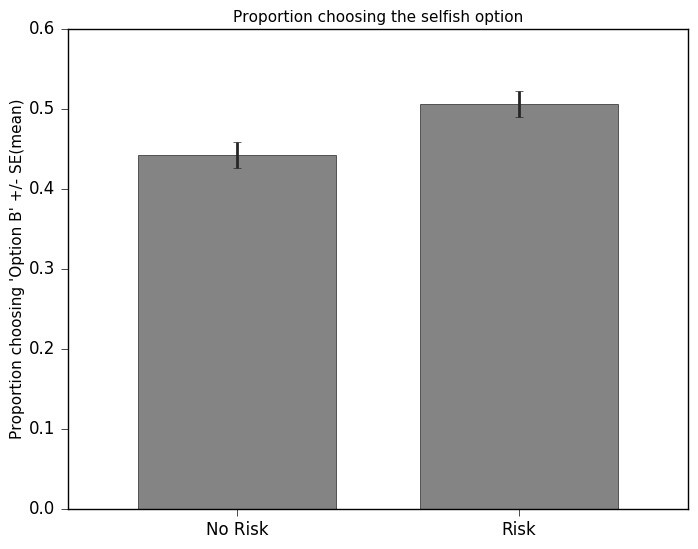

In [9]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor='w')
selfish_first['mean'].plot(yerr=selfish_first['sem'], ax=ax, error_kw=e_kwargs, **bar_kwargs)
ax.set_title('Proportion choosing the selfish option', **font_kwargs)
ax.tick_params(axis='x', rotation=0, **tick_kwargs)
ax.tick_params(axis='y', **tick_kwargs)
ax.set_ylabel("Proportion choosing 'Option B' +/- SE(mean)", **ylabel_kwargs)
ax.set_xlabel("") 
plt.savefig(os.path.join(FIGURES_FOLDER, 'selfish_first.pdf'), bbox_inches='tight')
plt.show()

#### Pairwise sample proportion test for proportion of subjects choosing selfish, first dimension

In [10]:
mct = MultiComparison(df1.Decision, df1.Treatment_first)
mct.allpairtest(stats.ttest_ind, method='Holm')[0]

group1,group2,stat,pval,pval_corr,reject
No Risk,Risk,-2.7104,0.0068,0.0068,True


#### Proportion of players chosing the selfish option, by first second dimension

In [11]:
selfish_second = df1.groupby('Treatment_second')['Decision']\
        .agg(['mean', 'sem', 'count'])\
        .rename_axis('Treatment', axis=0)\
        .reindex(['Dictate', 'Framed', 'Advise'], axis=0)

display(selfish_second)

,mean,sem,count
Treatment,,,
Dictate,0.556,0.020,603
Framed,0.483,0.020,598
Advise,0.381,0.020,598


#### Plotting proportion of players chosing the selfish option, by first second dimension

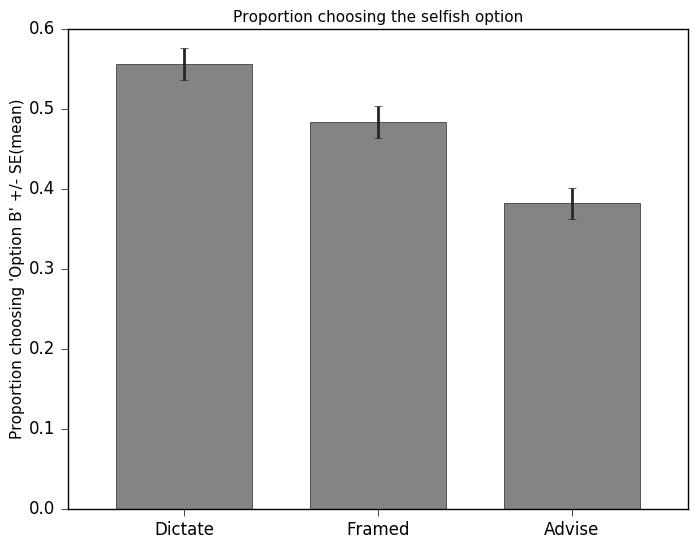

In [12]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor='w')
selfish_second['mean'].plot(yerr=selfish_second['sem'], ax=ax, error_kw=e_kwargs, **bar_kwargs)
ax.set_title('Proportion choosing the selfish option', **font_kwargs)
ax.tick_params(axis='x', rotation=0, **tick_kwargs)
ax.tick_params(axis='y', **tick_kwargs)
ax.set_ylabel("Proportion choosing 'Option B' +/- SE(mean)", **ylabel_kwargs)
ax.set_xlabel("") 
plt.savefig(os.path.join(FIGURES_FOLDER, 'selfish_first.pdf'), bbox_inches='tight')
plt.show()

#### Pairwise sample proportion test for proportion of subjects choosing selfish, first dimension

In [13]:
mct = MultiComparison(df1.Decision, df1.Treatment_second)
mct.allpairtest(stats.ttest_ind, method='Holm')[0]

group1,group2,stat,pval,pval_corr,reject
Advise,Dictate,-6.141,0.0,0.0,True
Advise,Framed,-3.5766,0.0004,0.0007,True
Dictate,Framed,2.5112,0.0122,0.0122,True


#### Cross tabulate proportion off subjects choosing the selfish option

In [14]:
selfish_cross = pd.crosstab(
        df['Treatment_first'],
        df['Treatment_second'],
        values= df['Decision'],
        aggfunc='mean',
        margins=True)\
    .rename_axis('', axis=0)\
    .rename_axis('', axis=1)\
    .reindex(['Dictate', 'Framed', 'Advise', 'All'], axis=1)
    
display(selfish_cross)

,Dictate,Framed,Advise,All
,,,,
No Risk,0.554,0.423,0.373,0.450
Risk,0.558,0.545,0.425,0.510
All,0.556,0.484,0.399,0.480


#### Figure 2: Proportion of players chosing the selfish option <a id='selfish_bar'></a>

In [15]:
selfish = df1.groupby(['Treatment_first', 'Treatment_second'])['Decision']\
    .agg(['mean', 'sem', 'count'])\
    .reindex(['Dictate', 'Framed', 'Advise'], axis=0, level=1)

display(selfish)

mean   sem  count
Treatment_first Treatment_second                   
No Risk         Dictate          0.553 0.029    304
                Framed           0.418 0.029    297
                Advise           0.354 0.028    302
Risk            Dictate          0.559 0.029    299
                Framed           0.548 0.029    301
                Advise           0.409 0.029    296

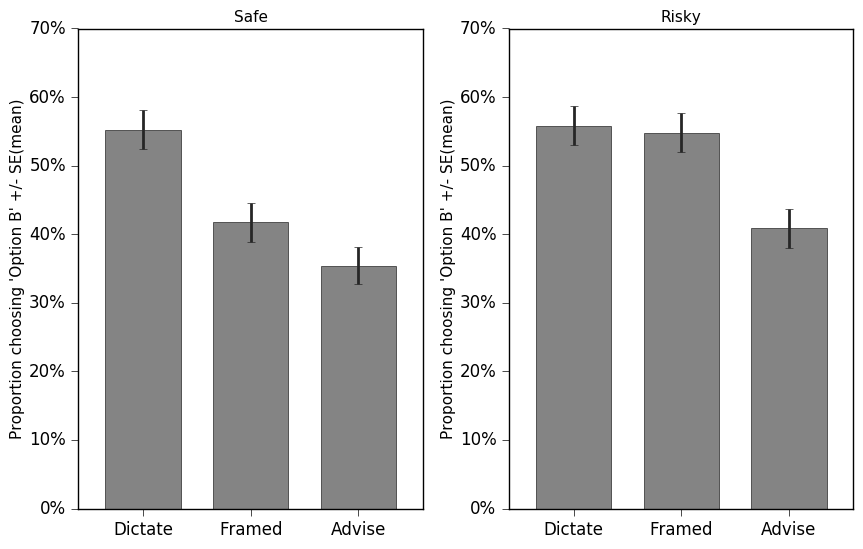

In [16]:
fig, axis = plt.subplots(ncols=2, figsize=(10, 6), dpi=100, facecolor='w')
fig.subplots_adjust(wspace=0.25)
axis[0].set_title('Safe', **font_kwargs)
axis[1].set_title('Risky', **font_kwargs)
selfish.loc['No Risk', 'mean'].plot(yerr=selfish.loc['No Risk', 'sem'], ax=axis[0], error_kw=e_kwargs, **bar_kwargs)
selfish.loc[   'Risk', 'mean'].plot(yerr=selfish.loc[   'Risk', 'sem'], ax=axis[1], error_kw=e_kwargs, **bar_kwargs)
for ax in axis:
    ax.tick_params(axis='x', rotation=0, **tick_kwargs)
    ax.tick_params(axis='y', **tick_kwargs)
    ax.set_ylim(0.0,0.7) 
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.set_ylabel("Proportion choosing 'Option B' +/- SE(mean)", **ylabel_kwargs)
    ax.set_xlabel("") 
plt.savefig(os.path.join(FIGURES_FOLDER, 'selfish_all.pdf'), bbox_inches='tight')
plt.show()

#### Table 2: Regressing the probability of player X to choose the selfish option <a id='selfish_reg'></a>

In [17]:
regs = dict()
regs['reg1'] = 'Decision ~ Advise + Framed'
regs['reg2'] = 'Decision ~ Risk'
regs['reg3'] = 'Decision ~ (Advise + Framed) * (Risk)'
regs['reg4'] =  regs['reg3'] + ' + Age + Female + Education + Political'

ols_results = []
for k, v in regs.items():
    ols = smf.ols(formula=v, data=df1).fit()
    ols = ols.get_robustcov_results()
    ols_results.append(ols)

order = [
    'Framed',
    'Advise',
    'Risk',
    'Framed:Risk',
    'Advise:Risk', 
    'Age',
    'Female',
    'Education',
    'Political',
    'Intercept',
]

auxiliary = {
    'N': lambda x: "{:d}".format(int(x.nobs)),
    'R2': lambda x: "{:.3f}".format(x.rsquared),
    'P>F': lambda x: "{:.3f}".format(x.f_pvalue.item()),
}
ols_quant = summary_col(
    ols_results,
    stars=True,
    info_dict=auxiliary,
    float_format='%.3f',
    regressor_order=order
)
ols_quant = ols_quant\
    .tables[0]\
    .rename(mapper=lambda x: x.replace('_', ' ').replace(':', ' * ').capitalize(), axis=0)\
    .rename(mapper=lambda x: x.capitalize().split()[0].replace('_', ' '), axis=1)\

ols_quant.to_latex(
    os.path.join(TABLES_FOLDER, 'ols_selfish.tex'),
    bold_rows=True,
    float_format="%.3f"
)
display(ols_quant)

,Decision,Decision,Decision,Decision
Framed,-0.072**,,-0.135***,-0.131***
,(0.029),,(0.040),(0.040)
Advise,-0.174***,,-0.198***,-0.198***
,(0.028),,(0.040),(0.040)
Risk,,0.064***,0.006,0.007
,,(0.024),(0.041),(0.040)
Framed * risk,,,0.125**,0.122**
,,,(0.057),(0.057)
Advise * risk,,,0.049,0.049
,,,(0.057),(0.057)


In [18]:
anova_lm(*ols_results, robust='hc3')

/home/sebastian/.virtualenvs/fair_advice/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/sebastian/.virtualenvs/fair_advice/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/sebastian/.virtualenvs/fair_advice/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1796.000,439.292,0.000,nan,nan,nan
1,1797.000,446.670,-1.000,-7.378,30.772,nan
2,1793.000,436.291,4.000,10.379,10.823,0.000
3,1789.000,428.925,4.000,7.366,7.681,0.000
